# Assignment 2: Probability Sampling and Pandas
## Due Date: Sunday, October 6, 11:59PM
## CS577 

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list  collaborators here*

In [58]:
# 
import sys
print(sys.version)

3.11.8 (main, Feb 26 2024, 15:36:12) [Clang 14.0.6 ]


## Scoring Breakdown

|Question|Points|
|---|---|
|1|30|
|2|10|
|3|10|
|4|10|
|5|40|
|**Total**|100|

# Part 1: Probability

## Question 1

1.1. Suppose you sample 100 times at random with replacement from a population in which 34% of the individuals are successes. Write a Python expression that evaluates to the chance that the sample has 15 successes.  


One way to compute the *binomial coefficients* $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is to use the `SciPy` module `special`. `SciPy` is a collection of Python-based software for math, probability, statistics, science, and engineering.

Hint 1:`special.comb(n, k)` evaluates to $\binom{n}{k}$. 

Hint 2: `special.factorial(n)` evaluates to $n!$.

In [59]:
from scipy import special

In [60]:
# the full expression 

def my_probability(n, p, k):
    return special.comb(n, k) * (p**k) * ((1 - p)**(n - k))



In [61]:
my_probability(100, 0.34, 15)

1.0892295686895682e-05

1.2. Complete the cell with a Python expression that evaluates to an array whose elements are the chances of $k$ successes for $k = 0, 1, 2, \ldots, 100$. That is, `all_probs[k]` should contain $P(X = k)$, where $X$ is the random variable describing the number of successes drawn from the scenario outlined above.

In [62]:

n = 100
p= 0.34

all_probs = [my_probability( 100, p, k)   for k in range(0, n+1, 1)]


In [63]:
all_probs

[9.003130684840668e-19,
 4.637976413402769e-17,
 1.1826839854177066e-15,
 1.990254060308989e-14,
 2.4863098071587304e-13,
 2.4591864274442716e-12,
 2.005851555718434e-11,
 1.3875977428736185e-10,
 8.309818301072692e-10,
 4.375944721507641e-09,
 2.0513898436885825e-08,
 8.6463538866213e-08,
 3.303518543044957e-07,
 1.1519962098823441e-06,
 3.6878839705973763e-06,
 1.0892295686895682e-05,
 2.98094077037202e-05,
 7.587849233674233e-05,
 0.00018024335469216072,
 0.0004007324345149476,
 0.0008360735792834587,
 0.0016407793186515212,
 0.003035215736844343,
 0.0053026298643683795,
 0.008764068803608853,
 0.013725062902136532,
 0.02039563543149659,
 0.028796531282629323,
 0.038675860737817085,
 0.04946630464272532,
 0.06030891889269643,
 0.07015406987517965,
 0.07792682193521373,
 0.08272121777512133,
 0.08397456955959286,
 0.08157529614360451,
 0.07587601198542343,
 0.06761105736293258,
 0.05774437195829411,
 0.0472902626604833,
 0.03715151695372817,
 0.028007795486180886,
 0.0202682675848769

In [64]:
len(all_probs)
# there should be 101 elements in the results

101

In [65]:
all_probs[0]
# first value should be this.

9.003130684840668e-19

In [66]:
all_probs[100]
# last value should be this

1.4056969554982776e-47

1.3. Complete the cell with an expression that evaluates to the chance that the number of successes in the sample is in the interval $34 \pm 10$ (inclusive on both sides). In other words, determine $P(24 \leq X \leq 44)$. **Hint: You might want to apply your Python indexing knowledge here.**

In [67]:
n = 100
# the probilitiy of the event is not changing, just the size of the success 
all_range = [my_probability( 100, 0.34, k)  for k in range(24, 45)]

sum(all_range)


0.9739158711274085

In [68]:

"{:.3f}".format(sum(all_range))

'0.974'

## Question 2
Consider a sample of size $n$ drawn at random with replacement from a population in which a proportion $p$ of the individuals are called successes.

Let $S$ be the random variable that denotes the number of successes in our sample. (As stated above, $S$ follows the binomial distribution.) Then, the probability that the number of successes in our sample is **at most** $s$ (where $0 \leq s \leq n$) is

$$P(S \leq s) = P(S = 0) + P(S = 1) + ... + P(S = s) = \sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$$

We obtain this by summing the probability that the number of successes is exactly $k$, for each value of $k = 0, 1, 2, ..., s$.


Please fill in the function `prob_at_most` which takes $n$, $p$, and $s$ and returns $P(S \le s)$ as defined above. If the inputs are invalid: for instance, if $p > 1$ OR $s > n$ then return 0." 

In [69]:
def prob_at_most(n, p, s):
    accum_prob = sum([my_probability( n, p, k) for k in range(s+1)])
    return (accum_prob)



    
result = prob_at_most(100, 0.34, 10)


print(result)

# 

2.5882372228258107e-08


## Question 3

In an election, supporters of Candidate C are in a minority. Only 24% of the voters in the population favor the candidate C.

Suppose a survey organization takes a sample of 500 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

In [70]:
# approach #1
# 
#this is the best way to solve it, but the student could have solve it in
# the approach in approach #2
lowerHalf = prob_at_most(500, 0.24, 250)
print(lowerHalf)



0.9999999999999074


In [71]:
fullPortion = prob_at_most(500, 0.24, 500)
print(fullPortion)

0.9999999999999074


In [81]:

fullPortion-lowerHalf

# the answer should be zero based on 0.24 percent.  
# if the students have zero as the answer, they get 1 pt for correct value.



0.0

In [73]:
# however I made the percentage too low, I should have increased it from 35% to 39% to see noticeable differences
# to ensure that they students did it correctly, i will ask the students to add this to #3 to see if the difference is noticeable
prob_at_most(500, 0.35, 250)



0.9999999999975152

In [74]:
fullPortion35 = prob_at_most(500, 0.35, 500)
fullPortion35

0.9999999999998462

In [77]:
lowerHalf35 = prob_at_most(500, 0.35, 250)

In [80]:
fullPortion35-lowerHalf35 
# the answer should be  below  based on 0.35 percent.

2.3310242625029787e-12

In [14]:
# approach #2
# If we dont re-use the prob_at_most because the range is from 0 to s.
# since we want to calculate the chances when more than half - to -full population
# so we use 251 to 500.
n= 500
p = 0.35
sum([special.comb(n,k) * (p**k) * ((1-p)**(n-k)) for k in range(251, 501)])



2.331088684402839e-12

In [15]:
# approach 3

1-lowerHalf -(1-fullPortion)

0.0

In [16]:
1-lowerHalf
# if students did to remove the extra part from accuracy

9.259260025373806e-14

In [17]:
fullPortion

0.9999999999999074

In [18]:
1-fullPortion

9.259260025373806e-14

# Part 2: Pandas
## Question 4
For the following DataFrame (fruit_info), add a column by d['new column name'] = ... and assigning a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called rank1 to the fruit_info table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty).


In [19]:
import pandas as pd
fruit_info = pd.DataFrame(
data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
'color': ['red', 'orange', 'yellow', 'pink']
})
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [20]:
fruit_info = fruit_info.drop(columns=['rank1'],errors="ignore" )
fruit_info.insert(2, "rank1", [1, 1, 4, 2], True)
fruit_info
# 8 points for showing the whole dataframe below
# 1 points for using drop to remove the column if it already exists.
# 2 for adding the series into the fruit_info dataframe

,fruit,color,rank1
0,apple,red,1
1,orange,orange,1
2,banana,yellow,4
3,raspberry,pink,2


## Question 5

Find the babyNames.csv from the files section in canvas.

Use the babyNames DataFrame and perform the following operations:

5.1. Find the first three names (ordered alphabetically) in Year 2001 that have larger than 2000 counts.

In [21]:
babyNames = pd.read_csv('babyNames.csv')
year2001 = babyNames[babyNames['Year'] == 2001]
year2001[year2001['Count'] > 2000].sort_values("Name").head(3)
# 3 points for using correct 2001 filter
# 3 points for showing all the columns
# 4 points for showing the same correct rows as mine

,State,Sex,Year,Name,Count
333924,CA,M,2001,Alexander,2086
152812,CA,F,2001,Alyssa,2059
333907,CA,M,2001,Andrew,3447


5.2. Find the first 10 names (ordered by Year) that start with “Ja” and ends with “e”.

In [22]:
# 2 points for using dataframe
# 2 points for using str functions startwith
# 2 points for using str function endswith
# 2 points for showing 10 first names
# 2 points for Jane in 1910 first with 17, and Jane again in 1914 with 71
babyNames[[x.startswith('Ja') and x.endswith('e') for x in babyNames["Name"]]].sort_values("Year").head(10)

,State,Sex,Year,Name,Count
94,CA,F,1910,Jane,17
218,CA,F,1910,Jacqueline,5
272,CA,F,1911,Jane,42
553,CA,F,1912,Jane,36
660,CA,F,1912,Jacqueline,11
743,CA,F,1912,Janice,6
983,CA,F,1913,Jacqueline,11
1026,CA,F,1913,Janice,8
823,CA,F,1913,Jane,81
1164,CA,F,1914,Jane,71


5.3. Plot the popularity of the name Michael over time. 

In [23]:
MichaelDF = babyNames[babyNames['Name'] == 'Michael']


In [24]:
x_values = MichaelDF["Year"]
y_values = MichaelDF["Count"]


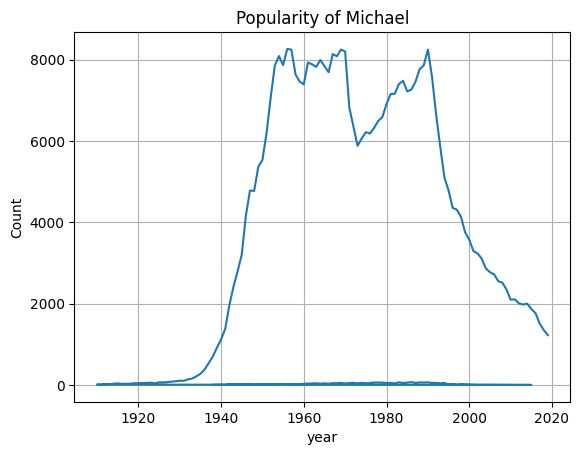

In [25]:

import matplotlib.pyplot as plt
plt.plot(x_values, y_values)
plt.xlabel('year')
plt.ylabel('Count')
plt.title(r'Popularity of Michael')
plt.grid(True)
plt.show()

5.4. Find unisex baby names (i.e., names that are used by females and males).

In [26]:
# there are many ways to solve this.


babyNames.query("Sex == 'F'")["Name"]

0             Mary
1            Helen
2          Dorothy
3         Margaret
4          Frances
            ...   
228488        Zoha
228489     Zuleika
228490     Zuleyma
228491       Zuria
228492        Zyah
Name: Name, Length: 228493, dtype: object

In [27]:
babyNames.query("Sex == 'M' ")["Name"]

228493       John
228494    William
228495      James
228496     Robert
228497     George
           ...   
387776    Zayvion
387777       Zeek
387778     Zhaire
387779       Zian
387780      Ziyad
Name: Name, Length: 159288, dtype: object

In [28]:
type(babyNames.query("Sex == 'M' ")["Name"])

pandas.core.series.Series

In [29]:
series_males = pd.DataFrame(babyNames.query("Sex == 'M' ")["Name"])
len(series_males)
# this contains duplicates rows of "John"

159288

In [30]:
series_female = pd.DataFrame(babyNames.query("Sex == 'F' ")["Name"])
len(series_female)
# this contains duplicate rows of "Jane"

228493

In [31]:
# this is going an intersection of male and female names
male_set = set(series_males["Name"].to_list())
female_set = set(series_female["Name"].to_list())
sortedUnisexNames = sorted( male_set & female_set)

# another way by using sets and intersection of tht two sets
secondway = set(series_males["Name"].to_list()).intersection(set(series_female["Name"].to_list()))
secondwaySorted = sorted(secondway)

In [32]:
len(male_set)
# unique name of males

8187

In [33]:
len(female_set)
# unique names of female

13402

In [34]:
len(sortedUnisexNames)

1759

In [35]:
myList = list(sortedUnisexNames)[:10]
for i, val in enumerate(myList):
    print(val)

Aarin
Aaron
Aarya
Aaryn
Abeer
Abigail
Abisai
Abraham
Ace
Adair


In [36]:
len(sortedUnisexNames)

1759

In [37]:
len(secondwaySorted)

1759

In [38]:
len(babyNames)

387781

In [39]:
"Dorothy" in sortedUnisexNames

True

In [40]:
"Frances" in sortedUnisexNames

True

In [41]:
babyNames.tail(10)

,State,Sex,Year,Name,Count
387771,CA,M,2019,Zackariah,5
387772,CA,M,2019,Zahid,5
387773,CA,M,2019,Zakariah,5
387774,CA,M,2019,Zavien,5
387775,CA,M,2019,Zay,5
387776,CA,M,2019,Zayvion,5
387777,CA,M,2019,Zeek,5
387778,CA,M,2019,Zhaire,5
387779,CA,M,2019,Zian,5
387780,CA,M,2019,Ziyad,5


In [42]:
babyNames.head(20)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
5,CA,F,1910,Ruth,128
6,CA,F,1910,Evelyn,126
7,CA,F,1910,Alice,118
8,CA,F,1910,Virginia,101
9,CA,F,1910,Elizabeth,93


In [43]:
"Ziyad" in sortedUnisexNames

False

In [44]:
"Rose" in sortedUnisexNames

False